### PCA
* 기존 피처를 저차원의 중요 피처로 압축해서 추출
* 차원의 축소를 통해 데이터를 잘 설명 할 수 있는 피처를 추출
* 피처가 많이 있으면 학습 속도가 느릴 뿐만아니라 성능 또한 좋지 않을 가능성이 크다
* 주성분 분석을 통한 차원축소 기능
    - 주성분 : 중요한 성분(분포의 방향)
>
* Argument
    - n_component : 차원의 수(feature의 수)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df =pd.DataFrame(iris['data'], columns =columns)

df['target']= iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.shape

(150, 5)

Text(0.5, 1.0, 'Sepal')

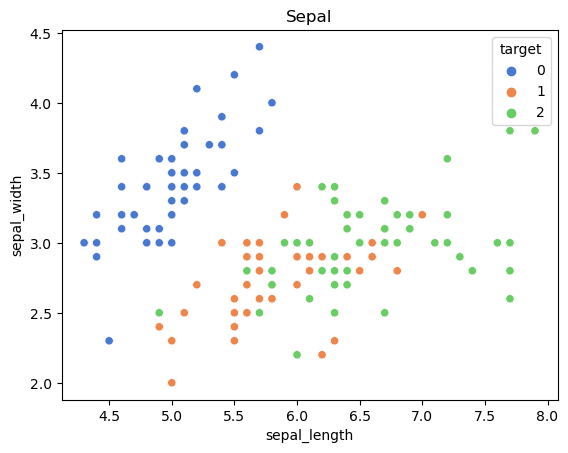

In [7]:
import seaborn as sns

sns.scatterplot(x='sepal_length', y='sepal_width', hue='target', data=df,palette='muted')
plt.title('Sepal')

### PCA 변환

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2개의 속성으로 줄임
iris_pca =pca.fit_transform(iris.data)
iris_pca.shape

(150, 2)

In [9]:
col = ['pca_1','pca_2']
df_pca = pd.DataFrame(iris_pca, columns= col)
df_pca['target']= iris.target
df_pca.head()

,pca_1,pca_2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

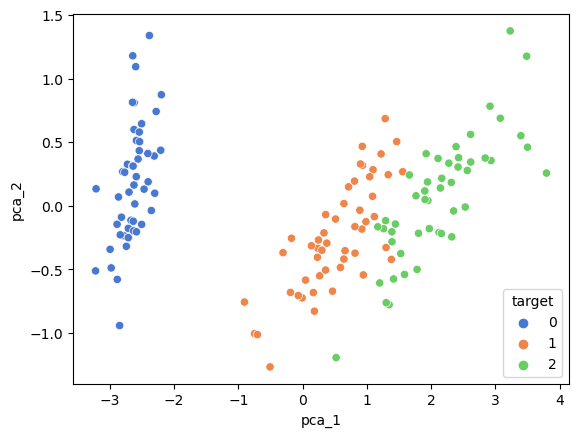

In [11]:
sns.scatterplot(x= 'pca_1',y='pca_2',hue = 'target', data=df_pca, palette = 'muted' )

### train,test분리

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(df[columns], df['target'],test_size=0.2,random_state=11)

px_train, px_test, py_train, py_test =\
    train_test_split(df_pca[col], df_pca['target'],test_size=0.2,random_state=11)

In [18]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)

dc_pca = DecisionTreeClassifier()
dc_pca.fit(px_train, py_train)

print('train : ', dc.score(X_train,y_train))
print('test : ', dc.score(X_test, y_test))
print('='*30)
print('pca train : ', dc_pca.score(px_train, py_train))
print('pca test : ', dc_pca.score(px_test, py_test))

train :  1.0
test :  0.9333333333333333
pca train :  1.0
pca test :  0.9333333333333333


In [19]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [21]:
np.sum(pca.explained_variance_ratio_)

0.9776852063187949

### pca 복원

In [22]:
df_inverse = pca.inverse_transform(iris_pca)
df_inverse.shape

(150, 4)

In [24]:
print(df_inverse[0].round(1))
print(iris.data[0])

[5.1 3.5 1.4 0.2]
[5.1 3.5 1.4 0.2]
